In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
import csv
import math
import re

In [20]:
mydata = pd.read_csv("spambase.csv");
mydata = mydata.drop(columns=['longest', 'total', 'average'], axis = 1)
mydata.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,edu,table,conference,;,(,[,!,$,#,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,1


In [21]:
class NaiveBayesClassifier:
    
    def fit(self, X, y):
        #We will use this to give each word a conditional probability considering it is spam.
        self.spam_attributes = []
        #We will use this to give each word a conditional probability considering it is ham.
        self.ham_attributes = []
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        
        self._priors = np.zeros(n_classes, dtype = np.float64)  #We want to calculate the prior probability.
        for c in self._classes:
            X_c = X[c==y] 
            self._priors[c] = X_c.shape[0] / float(X.shape[0]) #We divide the Spam/Ham with total num of emails i.e. X.shape[0]
            if c == 1:
                self.spam_attributes = X_c.sum(axis = 0) #We calculate conditional probabilities for each attribute given they're spam.
                self.spam_attributes = self.spam_attributes + 0.1 #Laplace smoothing
                self.spam_attributes[:] = [x / float(X_c.shape[0]*100) for x in self.spam_attributes] #After summing all percentages, we divide them with total spam messages to get Conditional probability.
            else :
                self.ham_attributes = X_c.sum(axis = 0) #We calc conditional probability given that they're ham.
                self.ham_attributes = self.ham_attributes + 0.1  #Laplace smoothing
                #After summing all percentages, we divide them with total spam messages to get Conditional probability.
                self.ham_attributes[:] = [x / float(X_c.shape[0]*100) for x in self.ham_attributes]
                
           
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self, x):      
        i = 0
        spam = 1;
        ham = 1;
        while i < len(x):
            if x[i] != 0:
                spam = spam * self.spam_attributes[i] * x[i]
                ham = ham * self.ham_attributes[i] * x[i]
            i +=1
        
        spam = spam*self._priors[1]
        ham = ham*self._priors[0]
        
        if spam > ham:
            return 1
        else:
            return 0
        
    def draw(self):
        plt.plot(self.ham_attributes, marker = ".", label = "Ham Emails")
        plt.plot(self.spam_attributes, marker = ".", label = "Spam Emails")
        plt.legend()
        plt.show()



In [22]:
def accuracy(y_true, y_pred):
    accuracy = 0
    i = 0
    while i < len(y_true):
        if y_true[i] == y_pred[i]:
            accuracy += 1
        i = i + 1
        
    return accuracy*100 / len(y_true)


X=mydata.iloc[:,:-1].values

y=mydata.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=123)

nb = NaiveBayesClassifier()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print("The accuracy of our Naive Bayes is: ", accuracy(y_test, predictions))

The accuracy of our Naive Bayes is:  88.09213385484571


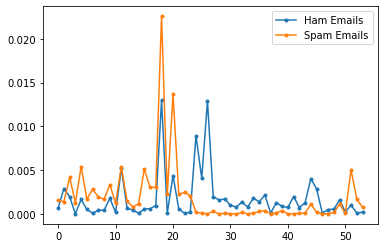

This diagram represents the importance our Naive Bayes algorithm gives to each attribute. Each attribute is a 'word'.
The higher value means that the attribute weighs heavily when computing if an email is Spam or Ham.
Note that no attribute ever hits a 0 because we have applied Laplace Smoothing.
From this we can see some trends and identify which words are more useful for spam and ham classification.
For majority of our dataset, it seems like attributes 2-22 play a greater role in pushing an email towards Spam.
However, these attributes also contribute fairly decently towards a ham email as well, just not in equal importance.
By far, the word that contributes the most towards a Spam email is the word 'You'.
However, since the word is so commonly used, even Ham emails use it a respectable amount
We can also see how attributes from around 23-24 all the way to attribute 45-46 greatly help towards classifying
an email as Ham, while at the same time providing no benefit to Spam emails at a

In [23]:
nb.draw()
print("This diagram represents the importance our Naive Bayes algorithm gives to each attribute. Each attribute is a 'word'.")
print("The higher value means that the attribute weighs heavily when computing if an email is Spam or Ham.")
print("Note that no attribute ever hits a 0 because we have applied Laplace Smoothing.")
print("From this we can see some trends and identify which words are more useful for spam and ham classification.")
print("For majority of our dataset, it seems like attributes 2-22 play a greater role in pushing an email towards Spam.")
print("However, these attributes also contribute fairly decently towards a ham email as well, just not in equal importance.")
print("By far, the word that contributes the most towards a Spam email is the word 'You'.")
print("However, since the word is so commonly used, even Ham emails use it a respectable amount")
print("We can also see how attributes from around 23-24 all the way to attribute 45-46 greatly help towards classifying")
print("an email as Ham, while at the same time providing no benefit to Spam emails at all. The values are almost 0")
print("From attributes 50 till the end, Spam email classification is greatly helped. It makes sense as well, ")
print("as these include words such as '!' '$' and '#', things that you would expect in a Spam email.")
